# 3. Imagen

In [13]:
#importar librerias
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
#cargar la imagen
image = Image.open('Messi.jpg').convert('L')  # Convertir a escala de grises
image = np.array(image)

In [15]:
#hacer que las dimensiones de la imagen sean divisibles por C
C = 8
height, width = image.shape
new_height = height - (height % C)
new_width = width - (width % C)
image = image[:new_height, :new_width]

In [16]:
#dividir la imagen en bloques de C x C
blocks = [image[i:i+C, j:j+C].flatten() for i in range(0, new_height, C) for j in range(0, new_width, C)]
X = np.array(blocks)

In [20]:
#lista de valores k
k_values = [1, 5, 10, 20, 50, 64]
mse_values = []  # Para almacenar los errores de reconstrucción

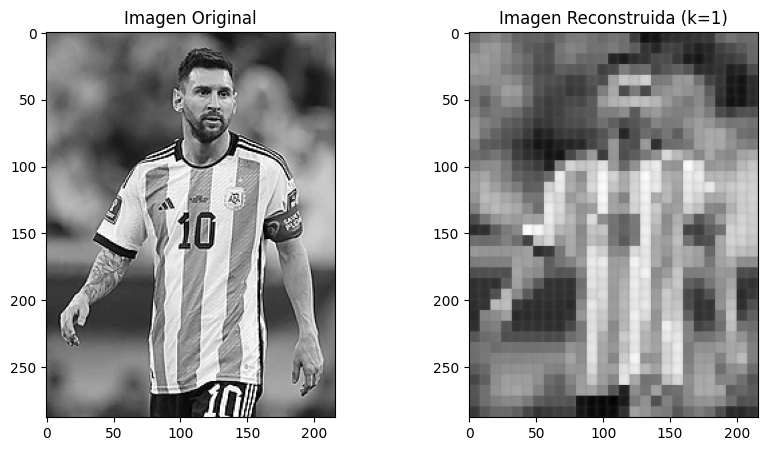

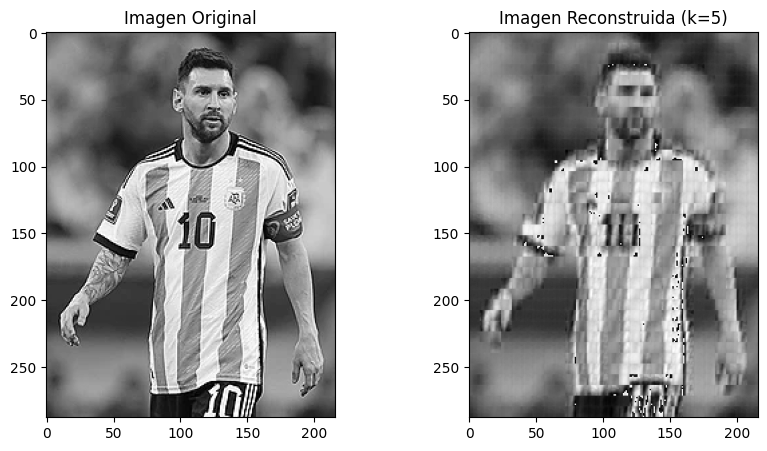

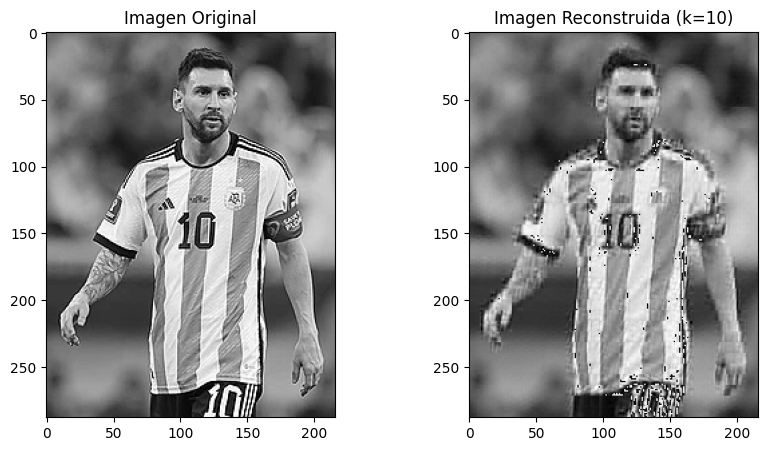

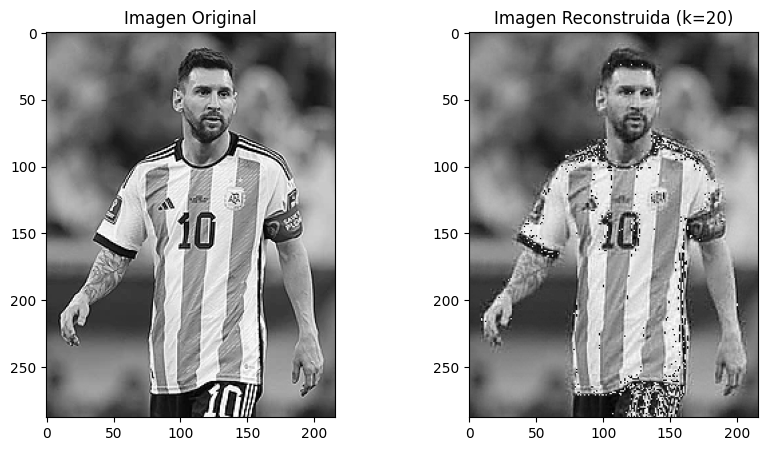

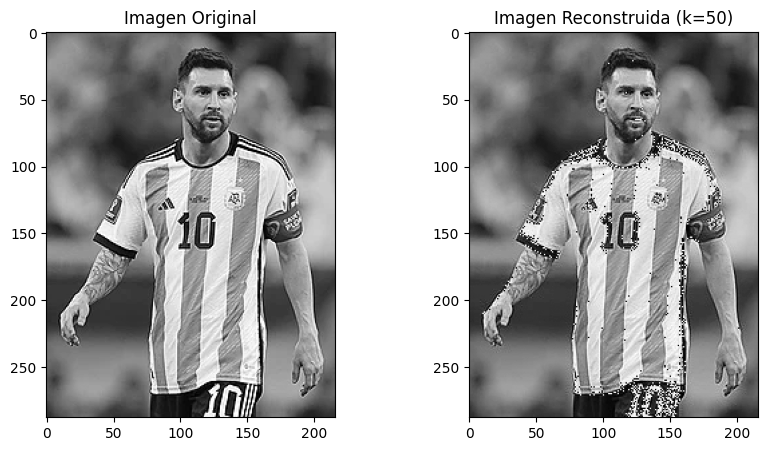

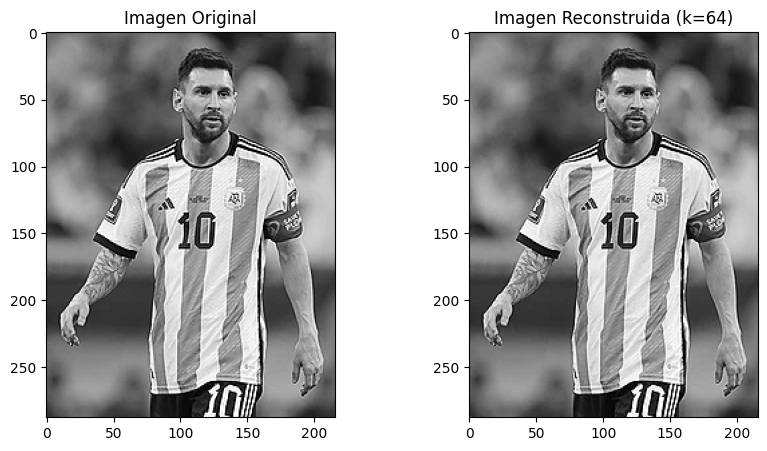

In [21]:
# Probar diferentes valores de k
for k in k_values:
    # Aplicar PCA
    pca = PCA(n_components=k)
    X_reduced = pca.fit_transform(X)
    
    # Reconstruir la imagen
    X_reconstructed = pca.inverse_transform(X_reduced)
    reconstructed_image = np.zeros_like(image)
    index = 0
    for i in range(0, new_height, C):
        for j in range(0, new_width, C):
            reconstructed_image[i:i+C, j:j+C] = X_reconstructed[index].reshape(C, C)
            index += 1
    
    # Calcular el error de reconstrucción (MSE)
    mse = np.mean((image - reconstructed_image) ** 2)
    mse_values.append(mse)
    
    # Mostrar la imagen reconstruida
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Imagen Original")
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(f"Imagen Reconstruida (k={k})")
    plt.imshow(reconstructed_image, cmap='gray')
    plt.show()


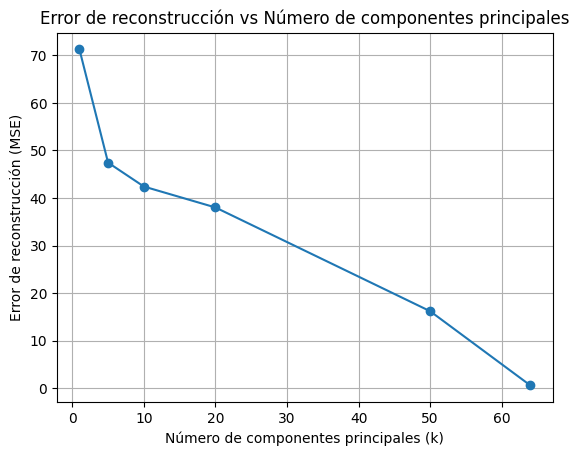

In [22]:
# Graficar el error de reconstrucción vs k
plt.figure()
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('Número de componentes principales (k)')
plt.ylabel('Error de reconstrucción (MSE)')
plt.title('Error de reconstrucción vs Número de componentes principales')
plt.grid(True)
plt.show()